In [252]:
import numpy as np  # 넘파이 사용
import matplotlib.pyplot as plt  # 그래프 그리기
from sklearn.model_selection import train_test_split  # 학습,테스트용 데이터로 나누는 모듈
from sklearn.linear_model import LinearRegression  # 선형 회귀 모델 모듈
from sklearn.metrics import mean_squared_error  # 잔차계산 모듈


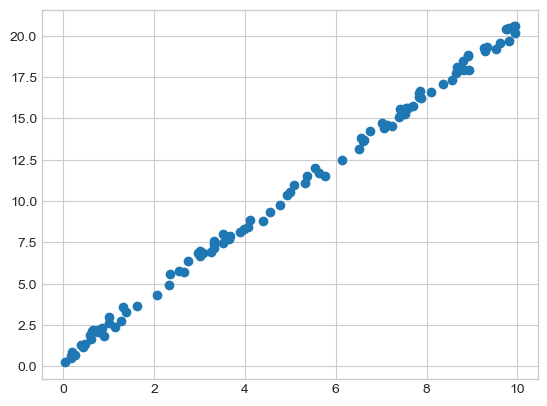

In [253]:
# 요놈은 데이터 
x = 10 * np.random.rand(100)
y = 2 * x + np.random.rand(100)

# 그래프 그리기
plt.scatter(x, y)

학습 데이터 평균 제곱 오차 (MSE,잔차): 0.07850337156161644
테스트 데이터 평균 제곱 오차 (MSE,잔차): 0.06274021599858005


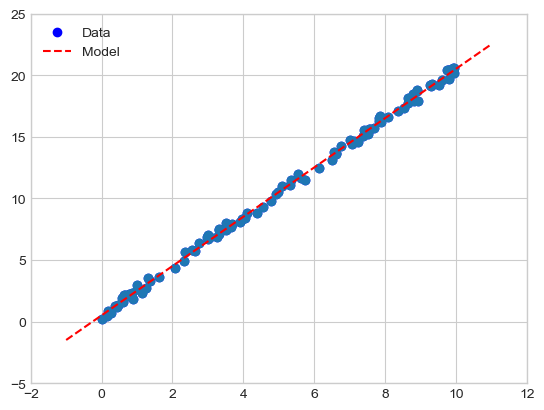

In [262]:
# 데이터를 학습용과 테스트용으로 나눔 (여기서는 80%를 학습용, 20%를 테스트용으로 나눔)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression() # LinearRegression 이라는 클래스를 model 이라는 인스턴스로 사용하겠다는 의미 
X_train = x_train[:, np.newaxis] # 2차원 배열로 변환 [ 변환하는 이유는 선형 회귀 모델은 행렬 연산으로 처리하기때문 ]
model.fit(X_train, y_train)  # 학습

# 예측값 계산
y_pred_train = model.predict(X_train) 
y_pred_test = model.predict(x_test[:,np.newaxis]) # 괄호 안에 들어가는 값은 무조건 2차원이여야 함

# 평가 지표 계산 (평균 제곱 오차) 한마디로 그냥 잔차 
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# 결과 출력
print("학습 데이터 평균 제곱 오차 (MSE,잔차):", mse_train)
print("테스트 데이터 평균 제곱 오차 (MSE,잔차):", mse_test)

# 그래프 그려주기 x,y 값 지정
xfit = np.linspace(-1, 11,100) # -1 부터 11까지 일정한 간격으로 50개(default = 50) 의 값을 만듬
Xfit = xfit[:, np.newaxis] # 2차원 배열로 변환
yfit = model.predict(Xfit) # 선형 회귀 모델이 Xfit이라는 2차원 array를 사용하여 예측을 함

# 그래프 그려주기
plt.scatter(x, y, label="Data", color="blue")
plt.plot(xfit, yfit, "--r", label="Model")
plt.scatter(x, y)
plt.ylim(-5,25)
plt.xlim(-2,12)
plt.legend()
plt.show()

In [263]:
# 기울기/ 절편

slope = float(model.coef_) # 기울기 구하기
intercept = model.intercept_ # 절편 구하기

# 결과 출력
print("기울기: %s"%slope)
print("절편: %s"%intercept)
print("y= %sX"%(slope),"+"*(float(intercept) > 0),"-"*(float(intercept) < 0)+"%s"%(intercept))


기울기: 2.0002129587265447
절편: 0.5028695657011486
y= 2.0002129587265447X + 0.5028695657011486


In [256]:
# 타이타닉 데이터는 자고 일어나서 ㅎ